In [55]:
import pandas as pd

pd.set_option('display.max_columns', None)

# Stage 1/5: Upload the data


In [56]:
general = pd.read_csv('test/general.csv')
prenatal = pd.read_csv('test/prenatal.csv')
sports = pd.read_csv('test/sports.csv')

In [57]:
general.head()

,Unnamed: 0,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,general,man,33,1.64,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,1,general,man,48,1.93,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,2,general,woman,23,1.54,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,3,general,man,27,1.94,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,4,general,woman,22,1.76,74,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


In [58]:
prenatal.head()

,Unnamed: 0,HOSPITAL,Sex,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,prenatal,NaN,27.0,1.63,74.0,28.0,pregnancy,t,t,t,NaN,f,0.0,3.0
1,1,prenatal,NaN,18.0,1.70,89.0,31.3,pregnancy,t,t,t,NaN,f,1.0,5.0
2,2,prenatal,NaN,34.0,1.65,67.0,24.9,pregnancy,t,t,t,NaN,f,1.0,5.0
3,3,prenatal,NaN,29.0,1.58,71.0,28.7,pregnancy,t,t,t,NaN,f,2.0,3.0
4,4,prenatal,NaN,33.0,1.51,57.0,25.3,pregnancy,t,t,t,NaN,f,1.0,7.0


In [59]:
sports.head()

,Unnamed: 0,Hospital,Male/female,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,sports,female,20.0,5.871,150.0,21.3,sprain,NaN,f,NaN,t,f,NaN,NaN
1,1,sports,female,20.0,6.665,248.0,27.3,dislocation,NaN,f,NaN,f,t,NaN,NaN
2,2,sports,male,16.0,6.960,273.0,27.6,dislocation,NaN,f,NaN,f,t,NaN,NaN
3,3,sports,male,17.0,7.128,269.0,25.9,sprain,NaN,f,NaN,t,f,NaN,NaN
4,4,sports,male,19.0,5.993,209.0,28.4,dislocation,NaN,f,NaN,f,t,NaN,NaN


# Stage 2/5: Merge them


## 2.1 Rename columns


In [60]:
general.columns

Index(['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi',
       'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray',
       'children', 'months'],
      dtype='object')

In [61]:
sports.columns

Index(['Unnamed: 0', 'Hospital', 'Male/female', 'age', 'height', 'weight',
       'bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray',
       'children', 'months'],
      dtype='object')

In [62]:
prenatal.columns = general.columns
sports.columns = general.columns

## 2.2. Merge


In [63]:
df = pd.concat([general, prenatal, sports], ignore_index=True)

In [64]:
df = df.drop('Unnamed: 0', axis=1)

In [65]:
df.sample(n=20, random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
928,sports,male,22.0,5.961,183.0,25.2,sprain,NaN,f,NaN,t,f,NaN,NaN
926,sports,male,26.0,5.804,218.0,31.7,sprain,NaN,f,NaN,t,f,NaN,NaN
901,sports,female,23.0,5.894,199.0,28.0,sprain,NaN,f,NaN,t,f,NaN,NaN
87,general,man,54.0,1.720,78.0,26.4,stomach,f,NaN,t,NaN,NaN,NaN,NaN
884,sports,female,20.0,6.771,244.0,26.0,sprain,NaN,f,NaN,t,f,NaN,NaN
297,general,man,56.0,1.480,54.0,25.1,cold,f,NaN,NaN,NaN,NaN,NaN,NaN
112,general,man,77.0,1.690,77.0,27.1,heart,t,t,NaN,NaN,NaN,NaN,NaN
209,general,man,29.0,2.080,109.0,25.5,stomach,t,NaN,f,NaN,NaN,NaN,NaN
419,general,man,53.0,1.700,78.0,27.2,stomach,t,NaN,t,NaN,NaN,NaN,NaN
913,sports,female,22.0,6.435,250.0,29.5,sprain,NaN,f,NaN,t,f,NaN,NaN


# Stage 3/5: Improve your dataset

- 3.1. Delete all empty rows
- 3.2. Correct gender values to f and m
- 3.3. Replace the NaN values in the gender column of the prenatal hospital with f
- 3.4. Replace the NaN values in the bmi, diagnosis, blood_test, ecg, ultrasound, mri, xray, children, months columns with zeros


In [66]:
df.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,man,33.0,1.64,66.0,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,general,man,48.0,1.93,106.0,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,general,woman,23.0,1.54,63.0,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,general,man,27.0,1.94,103.0,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,general,woman,22.0,1.76,74.0,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


In [67]:
print(len(df))
df = df.dropna(how='all')
print(len(df))

1006
1000


In [68]:
df.gender.unique()

array(['man', 'woman', nan, 'female', 'male'], dtype=object)

In [69]:
df['gender'] = df['gender'].replace('man', 'm').replace('woman', 'f').replace('female', 'f').replace('male', 'm')

In [70]:
df.gender = df.gender.fillna('f')

In [71]:
df.blood_test.unique()

array(['t', nan, 'f'], dtype=object)

In [72]:
columns = ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
for col in columns:
    df[col] = df[col].fillna(0)

In [73]:
df.shape

(1000, 14)

In [74]:
df.sample(n=20, random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
929,sports,f,23.0,6.809,259.0,27.3,sprain,0,f,0,t,f,0.0,0.0
927,sports,m,21.0,6.052,172.0,22.9,sprain,0,f,0,t,f,0.0,0.0
516,prenatal,f,20.0,1.650,66.0,24.3,pregnancy,t,t,t,0,f,1.0,4.0
87,general,m,54.0,1.720,78.0,26.4,stomach,f,0,t,0,0,0.0,0.0
885,sports,f,16.0,5.915,188.0,26.3,sprain,0,f,0,t,f,0.0,0.0
463,prenatal,f,34.0,1.650,67.0,24.9,pregnancy,t,t,t,0,f,1.0,5.0
112,general,m,77.0,1.690,77.0,27.1,heart,t,t,0,0,0,0.0,0.0
297,general,m,56.0,1.480,54.0,25.1,cold,f,0,0,0,0,0.0,0.0
417,general,f,26.0,1.650,69.0,25.3,cold,t,0,0,0,0,0.0,0.0
660,prenatal,f,38.0,1.590,70.0,27.6,pregnancy,t,t,t,0,f,1.0,4.0


# Stage 4/5: The statistics

- 4.1. Which hospital has the highest number of patients?
- 4.2. What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.
- 4.3. What share of the patients in the sports hospital suffers from dislocation-related issues? Round the result to the third decimal place.
- 4.4. What is the difference in the median ages of the patients in the general and sports hospitals?
- 4.5. After data processing at the previous stages, the blood_test column has three values: t = a blood test was taken, f = a blood test wasn't taken, and 0 = there is no information. In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column among all the hospitals)? How many blood tests were taken?


In [78]:
answer1 = df.groupby('hospital').count().index[0]
print(f"The answer to the 1st question is {answer1}")

The answer to the 1st question is general


In [79]:
df.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.64,66.0,24.9,cold,t,0,0,0,0,0.0,0.0
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
2,general,f,23.0,1.54,63.0,26.8,cold,t,0,0,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
4,general,f,22.0,1.76,74.0,24.0,dislocation,0,0,0,0,f,0.0,0.0


In [85]:
general_hospital = df[df.hospital == 'general']
total_general_patients = len(general_hospital)
general_patients_stomach = len(general_hospital[general_hospital.diagnosis == 'stomach'])
output = general_patients_stomach / total_general_patients
output = round(output, 3)
print(f"The answer to the 2nd questions is {output}")

The answer to the 2nd questions is 0.325


In [84]:
df[df.hospital == 'sports'].diagnosis.unique()

array(['sprain', 'dislocation', 'fracture', 'stomach', 'cold'],
      dtype=object)

In [89]:
sports_hospital = df[df.hospital == 'sports']
output = sports_hospital.diagnosis.value_counts(normalize=True)['dislocation']
output = round(output, 3)
print(f"The answer to the 3rd questions is {output}")

The answer to the 3rd questions is 0.285


In [103]:
general_and_sports = df[df['hospital'].isin(['general', 'sports'])]
median_ages = general_and_sports.groupby('hospital')['age'].median()
difference = median_ages['general'] - median_ages['sports']
difference = int(difference)
print(f"The answer to the 4th question is {difference}")

The answer to the 4th question is 19


In [106]:
df.blood_test.unique()

array(['t', 0, 'f'], dtype=object)

In [141]:
taken_blood_tests = df[df.blood_test == 't'].groupby(['hospital', 'blood_test']).count().sort_values('gender', ascending=False)[['gender']]
print(f"The answer to the 5th question is {taken_blood_tests.index[0][0]}, {int(taken_blood_tests.gender[0])} blood tests")

The answer to the 5th question is prenatal, 325 blood tests


C:\Users\34613\AppData\Local\Temp\ipykernel_12592\760873666.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The answer to the 5th question is {taken_blood_tests.index[0][0]}, {int(taken_blood_tests.gender[0])} blood tests")


# Stage 5/5: Visualize it

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='Count'>

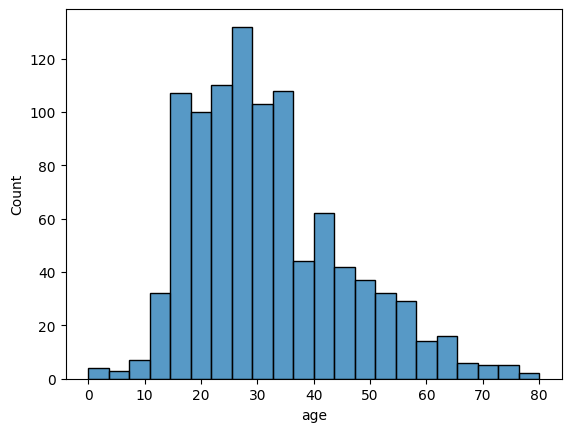

In [144]:
sns.histplot(data=df, x="age")

In [ ]:
print(f"The answer to the 1st question: 15-35")

In [149]:
df.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.64,66.0,24.9,cold,t,0,0,0,0,0.0,0.0
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
2,general,f,23.0,1.54,63.0,26.8,cold,t,0,0,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
4,general,f,22.0,1.76,74.0,24.0,dislocation,0,0,0,0,f,0.0,0.0


In [151]:
pie_df = df.diagnosis.value_counts()
pie_df

diagnosis
pregnancy      318
cold           194
stomach        157
sprain         104
dislocation     86
fracture        85
heart           56
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2674fe76060>,
 [Text(0.5952333648558569, 0.9250390485608564, 'pregnancy'),
  Text(-0.9468161568582772, 0.5599456805013521, 'cold'),
  Text(-0.9269043773929501, -0.5923244678128601, 'stomach'),
  Text(-0.199326304203811, -1.0817897320886578, 'sprain'),
  Text(0.4431973573418878, -1.006765167477087, 'dislocation'),
  Text(0.8959729939344632, -0.6381476272306547, 'fracture'),
  Text(1.0830208245705872, -0.19252504654315933, 'heart')])

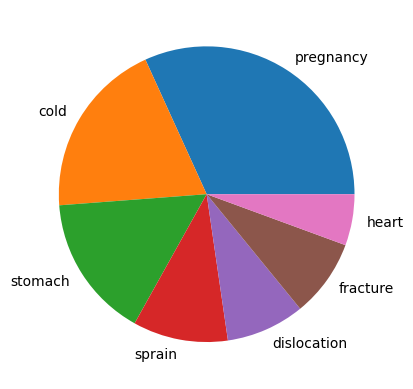

In [154]:
plt.pie(pie_df, labels=pie_df.index, )

In [ ]:
print(f"The answer to the 2nd question: pregnancy")

<Axes: xlabel='hospital', ylabel='height'>

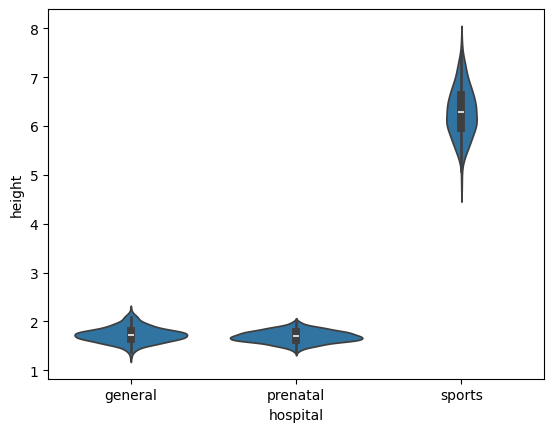

In [157]:
sns.violinplot(x=df["hospital"], y=df['height'])
